Vi valgte oppgave nummer 2, hvor vi skulle lage en SIR-modell for covid-19.

OBS! 
Legg merke til at populasjon blir nevnt i hundre tusen gjennom alle oppgavene. Vi delte på 1000 de stedene der populasjonen egt er i millioner for ikke å få overflow. Det står derfor langs y-aksene at befolkningstallene er i hundre tusen :) (Dette ble ikke gjort i Del 1).

Del 1:

C:\Users\anvuo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


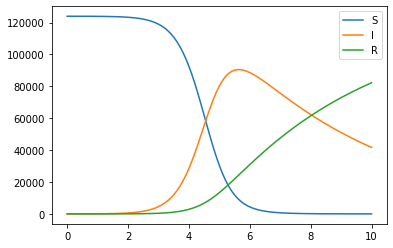

In [55]:
import numpy as np
import matplotlib.pyplot as plt


f = 0.2              # Hvor mange prosent som blir friske hver dag
b = 2*10**(-5)       # Hvor mange en syk smitter
dt = 0.1             # Liten dt
D = 10               # Antall dager
N_t = int(D/dt)      # Tidssteg
N =  124000          # Populasjon


t = np.linspace(0, D, D/dt+1)      # Liste for dager
S = np.zeros(N_t+1)                # Liste for friske
I = np.zeros(N_t+1)                # Liste for syke
R = np.zeros(N_t+1)                # Liste for kurerte

# Ved tid = 0
S[0] = N-10
I[0] = 10
R[0] = 0

# For-løke der vi regner ut verdiene for en dag og legger til i listene, før vi går en dag fremover og repeterer.
for n in range(N_t):
    S[n+1] = S[n] - dt*b*S[n]*I[n]
    I[n+1] = I[n] + dt*b*S[n]*I[n] - dt*f*I[n]
    R[n+1] = R[n] + dt*f*I[n]

# Plotting av grafer med 'legend'.
plt.plot(t, S, label = "S")
plt.plot(t, I, label = "I")
plt.plot(t, R, label = "R")
plt.legend()
plt.show()

Av 8.21 i boka, gjorde vi deloppgaver fra a til d. 

a: 

S'(t) = -b*S(t)*I(t)

S'(t) er stigning / synking i hvor mange som kan bli smittet. 
Denne er negativ siden antall personer som kan bli smittet kan bare bli mindre.
b blir negativ siden både S(t) og I(t) er positive. Konstanten b må være større eller lik 0.



R'(t) = f*I(t)

R'(t) er stigningen i antall personer som har vært syke og er nå friske.
f er hvor mange prosent av de syke som blir friske.
I(t) er hvor mange som er syke.
Stingningen til de friske vil komme ann på hvor mange syke det er og hvor mange av disse som blir friske.



b:

S'(t)+I'(t)+R'(t)=0

Alle personene vil være i en av disse gruppene så de vil tilsammen bli 0 (siden ingen dør). 
Den totale endringen vil alltid være null fordi hvis det er stigning i en så vil det være tilsvarende synkning i en annen.


I'(t)=b*s(t)*I(t)-f*I(t)

I'(t) er stingningen til antall personer som er syke og kan smitte andre.
Likningen er en omskrevet versjon av S'(t)'I'(t)'R'(t)=0
Vi setter inn likningene for R'(t) og S'(t) og isolerer I'(t)
-I'(t) = -b*S(t)*I(t)+f*I(t) 
Deretter ganger vi med -1 for å få I'(t) positiv
Vi ender da opp med I'(t)=b*S(t)*I(t)-f*I(t)

c og d er koden i ruten over:

Del 2:

C:\Users\anvuo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


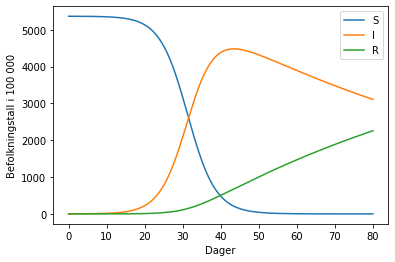

In [78]:
# Covid-19 Norge:
# Dette er en graf som viser for hvis ingen ble satt i isolasjon, og har "tilgang på alle mennesker".
import numpy as np
import matplotlib.pyplot as plt


b = 5.36e-5             # Hvor mange en syk person i Norge smitterhver dag (burde egt være 0.0536). 
dt = 0.1                # Delta-t ikke delta-x :)
D = 80                  # Antall dager med covid-19 i Norge
N_t = int(D/dt)         # Tidssteg
N = 5368000/1000        # Befolkning i Norge
f = 0.0113              # Snitt prosent som blir friske hver dag (over 80 dager)


t = np.linspace(0, D, D/dt+1)       # Liste for dager
S = np.zeros(N_t+1)                 # Liste for friske
I = np.zeros(N_t+1)                 # Liste for syke
R = np.zeros(N_t+1)                 # Liste for kurerte


# Ved tid = 0
S[0] = N-1
I[0] = 1
R[0] = 0

# For-løke der vi regner ut verdiene for en dag og legger til i listene, før vi går en dag fremover og repeterer.
for n in range(N_t):
    S[n+1] = S[n] - dt*b*S[n]*I[n]
    I[n+1] = I[n] + dt*b*S[n]*I[n] - dt*f*I[n]
    R[n+1] = R[n] + dt*f*I[n]

# Plotting av grafer med 'legend'.
plt.xlabel ('Dager')
plt.ylabel ('Befolkningstall i 100 000')
plt.plot(t, S, label = "S")
plt.plot(t, I, label = "I")
plt.plot(t, R, label = "R")
plt.legend()
plt.show()

Vi forsøkte å finne en representativ «worst case» smittedag, dvs: at antall smittede er over 1000, slik at man er godt inne i smitte forløpet. Vi lette oss så frem til den største endringen fra dag n til dag n+1. 

I Norge var det fra 26 i 3. til 27 i 3., med 363 nye smittede. 26 i 3. var det 3387 smittede og neste dag hadde dette økt med 363, som gir en "worst case" smittefaktor på 0.107. "best case" er jo 0, vi valgte derfor å legge b midt i mellom "best" og "worst case" (delte på 2), b er derfor lik 0.0536. 

Vi fant f, hvor mange som blir friske hver dag ved å ta 90% (hvor mange av alle syke i Norge som har blitt friske igjen) delt på 80 dager. Dette gir oss hvor mange prosent som blir friske hver dag, som ble 0.0113 (1.13%).

Del 3: 

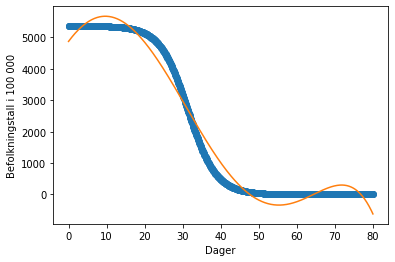

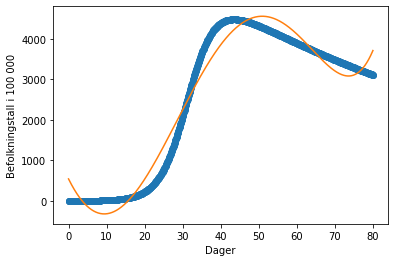

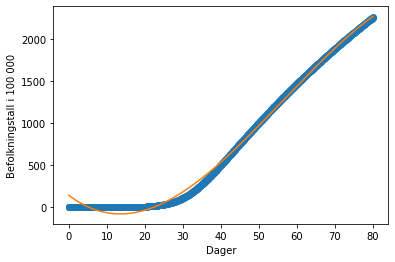

In [79]:
# Tar polyfit av grafene fra oppgaven over (Corona i Norge), i den graden vi mener at passer den "vanlige" grafen best. 
p1 = np.polyfit(t,S,5)
p2 = np.polyfit(t,I,5)
p3 = np.polyfit(t,R,3)

# Lager egne grafer av tallene fra polyfitten over.
y1 = np.polyval(p1,t)
y2 = np.polyval(p2,t)
y3 = np.polyval(p3,t)

# Her plotter vi både "vanlig" og polyfitt graf til S, I og R i hvert sitt felt.
plt.xlabel ('Dager')
plt.ylabel ('Befolkningstall i 100 000')
plt.plot(t,S,'o')
plt.plot(t,y1)
plt.show()

plt.xlabel ('Dager')
plt.ylabel ('Befolkningstall i 100 000')
plt.plot(t,I,'o')
plt.plot(t,y2)
plt.show()

plt.xlabel ('Dager')
plt.ylabel ('Befolkningstall i 100 000')
plt.plot(t,R,'o')
plt.plot(t,y3)
plt.show()

Del 4:

In [80]:
print(p2)

[ 2.85372385e-05 -3.42613167e-03 -7.13974926e-03  1.07541565e+01
 -1.89735849e+02  5.42312980e+02]


Printer ut polyfitt verdiene for p2 (polyfitt grafen for antall smittede).

In [81]:
def NorgeToMil (t): 
    return 2.85372385e-05*t**5 - 3.42613167e-03*t**4 - 7.13974926e-03*t**3 + 1.07541565e+01*t**2 - 1.89735849e+02*t + 5.42312980e+02

x = 0
while NorgeToMil(x) < 2.2e+3: 
    x += 1

print('Det blir 2.2 millioner mennesker smittet med corona i Norge ved dag nummer', x,'ifølge modellen vår.')

Det blir 2.2 millioner mennesker smittet med corona i Norge ved dag nummer 30 ifølge modellen vår.


Vi lager så en funksjon av t med tallene vi printet ut over, som vi bruker i en while-løkke som vil printe ut dagen da det har blitt 2.2 millioner smittede mennesker i Norge. 

OBS! Det står 2.2e+3 fordi befolkningstallene gjennom hele oppgaven er i hundre tusen :) 

Del 5: 

C:\Users\anvuo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


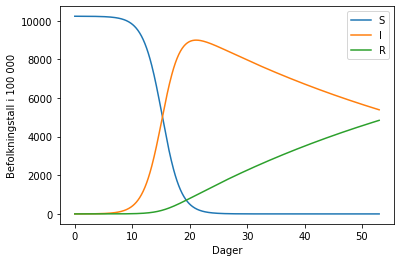

In [82]:
# Covid-19 Sverige:
# Dette er en graf som viser for hvis ingen ble satt i isolasjon, og har "tilgang på alle mennesker".
import matplotlib.pyplot as plt


b = 6.25e-5             # Hvor mange en syk person i Sverige smitter hver dag (burde egt være 0.0625)
dt = 0.1                # Delta-t ikke delta-x 
D = 53                  # Antall dager med covid-19 i Sverige
N_t = int(D/dt)         # Tidssteg
N = 10230000/1000       # Befolkning i Sverige
f = 0.017               # snitt prosent som blir friske hver dag (over 80 dager) i Sverige. 


t = np.linspace(0, D, D/dt+1)       # Liste for dager
S = np.zeros(N_t+1)                 # Liste for friske
I = np.zeros(N_t+1)                 # Liste for syke
R = np.zeros(N_t+1)                 # Liste for kurerte


# Ved tid = 0
S[0] = N-1
I[0] = 1
R[0] = 0

# For-løke der vi regner ut verdiene for en dag og legger til i listene, før vi går en dag fremover og repeterer.
for n in range(N_t):
    S[n+1] = S[n] - dt*b*S[n]*I[n]
    I[n+1] = I[n] + dt*b*S[n]*I[n] - dt*f*I[n]
    R[n+1] = R[n] + dt*f*I[n]

# Plotting av grafer med 'legend'.
plt.xlabel ('Dager')
plt.ylabel ('Befolkningstall i 100 000')
plt.plot(t, S, label = "S")
plt.plot(t, I, label = "I")
plt.plot(t, R, label = "R")
plt.legend()
plt.show()

Vi håper det er greit at vi valgte Sverige i stedet for Kina som du anbefalte i oppagven, vi tenkte bare at det ville være enklere å finne tall til Sverige enn Kina. Igjen, vi håper at dette ikke er noe stort problem :)

Vi fant b på samme måte her også, ved å lete frem den største endringen. Som her var fra 18 i 3. til 19 i 3., med 160 nye smittede. 18 i 3. var det 1279 smittede og neste dag haddde det økt med 160, som gir "worst case" faktor på 0.125, "best case" er fremdeles 0 og valgte derfor å legge b midt i mellom igjen (delte på 2) og fikk b lik 0.0625. 

For f, så antok vi at siden Norge og Sverige er veldig like i forhold til lokasjon og kultur. Og at prosent som har blitt friske igjen derfor er 90% av alle som er/har vært syke. Vi delte så 90% på antall dager med corona i Sverige, som er 53, og fikk f lik 0.017 (1.7%).

Det var de eneste tilpassningen og antakelsene vi gjorde i denne oppgave ut ifra corona-situasjonen i Norge.

Del 6:

Plottingen for oppgaven er under oppgave 5. Ut ifra våre grafer ville halvparten av Sverige befolkning være smittet i løpet av ca. 15 dager. Dette vil sansynlighvis ikke stemme på grunn av at den ikke tar hensyn til ulike tiltak som å stenge ned samfunnet, karantene for de syke og sosial distansering. Dette betyr at grafen tar for seg et verste scenarie for smitte hvor alt går som før. Videre viser grafen at de syke vil begynne å bli friske på ca. samme tidspunkt. På 20 dager er tilnærmet alle smittet så den eksponentiale veksten i antall smittede ser vi nå har blitt til en gradvis nedgang ettersom flere begynner å bli friske, som gjør at grafen går nedover selv om det fremdeles er folk som kan bli smittet. I denne grafer regner vi også med at alle som har vært syke blir friske, dette stemmer heller ikke helt ettersom at noen dør. Dette var noe vi skulle ta hensyn til, men desverre ikke fikk tid til. Til slutt ser vi at det blir stadig flere friske og tilsvarende færre syke, antall friske som ikke har vært syke er nå null.

Ekstra kommentar: Vi tok hele tiden utgangspunkt i tall fra FHI for å lage modellene våre om Norge og Sveroge. Vi tenker derfor at der ikke var nødvendig å tilpasse modellene (det sto noe slikt helt nederst i oppgaven, men ikke som en egen oppgave...) :)